In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

In [48]:
sheet = pd.read_csv('Night Rangers metrics.csv')
sheet

,Timestamp,Session_Id,Brick_Count,Attempts,Level_Number,Collectibles,DeathByEnemy,DeathByFall
0,10/2/22 20:46,6.380030e+17,1,6,1,3,2,3
1,10/2/22 20:47,6.380030e+17,0,7,2,4,2,3
2,10/2/22 20:51,6.380030e+17,2,5,1,3,2,2
3,10/2/22 20:52,6.380030e+17,1,3,2,4,0,0
4,10/2/22 20:58,6.380030e+17,2,3,1,2,1,1
...,...,...,...,...,...,...,...,...
184,10/9/22 21:52,6.380090e+17,3,1,1,2,0,0
185,10/9/22 21:52,6.380090e+17,1,2,3,1,1,0
186,10/9/22 21:53,6.380090e+17,1,1,3,1,0,0
187,10/9/22 21:53,6.380090e+17,1,1,3,1,0,0


In [55]:
brick_count = sheet['Brick_Count'].to_list()
attempts = sheet['Attempts'].to_list()
level_no = sheet['Level_Number'].to_list()
collectibles = sheet['Collectibles'].to_list()
dbenemy = sheet['DeathByEnemy'].to_list()
dbfall = sheet['DeathByFall'].to_list()

levels = set(level_no)
br = [[] for i in range(len(levels))]
at = [[] for i in range(len(levels))]
coll = [[] for i in range(len(levels))]
dbe = [[] for i in range(len(levels))]
dbf = [[] for i in range(len(levels))]
for i in range(len(brick_count)):
    ln = level_no[i]
    br[ln-1].append(brick_count[i])
    at[ln-1].append(attempts[i])
    coll[ln-1].append(collectibles[i])
    dbe[ln-1].append(dbenemy[i])
    dbf[ln-1].append(dbfall[i])
    
newbr = []
newat = []
newcoll = []
newdbe = []
newdbf = []

for i in range(1,len(levels)+1):
    newbr.append(mean(br[i-1]))
    newat.append(mean(at[i-1]))
    newcoll.append(mean(coll[i-1]))
    newdbe.append(mean(dbe[i-1]))
    newdbf.append(mean(dbf[i-1]) )   

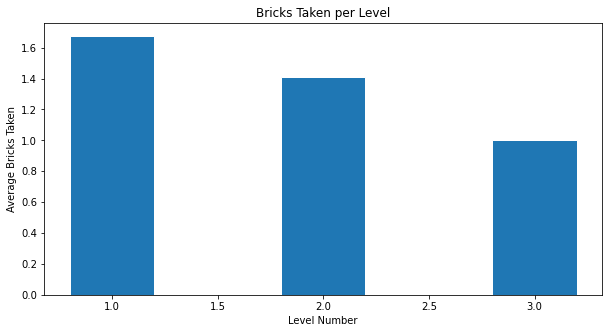

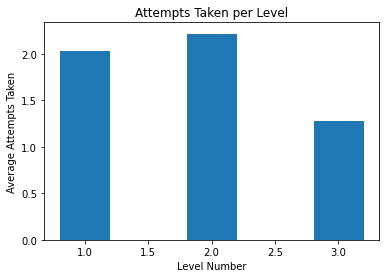

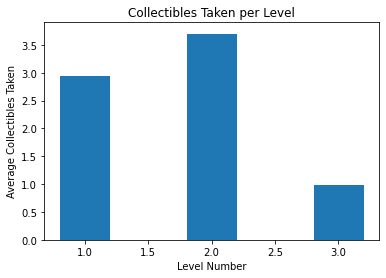

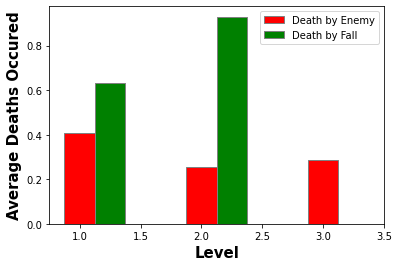

In [99]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar([i for i in range(1,len(levels)+1)], newbr, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Bricks Taken")
plt.title("Bricks Taken per Level")
plt.show()

plt.bar([i for i in range(1,len(levels)+1)], newat, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Attempts Taken")
plt.title("Attempts Taken per Level")
plt.show()

plt.bar([i for i in range(1,len(levels)+1)], newcoll, width = 0.4, edgecolor="white") 
plt.xlabel("Level Number")
plt.ylabel("Average Collectibles Taken")
plt.title("Collectibles Taken per Level")
plt.show()

br1 = [i for i in range(1,len(levels)+1)]
br2 = [i + 0.25 for i in br1]
 
# Make the plot
plt.bar(br1, newdbe, color ='r', width = 0.25,
        edgecolor ='grey', label ='Death by Enemy')
plt.bar(br2, newdbf, color ='g', width = 0.25,
        edgecolor ='grey', label ='Death by Fall')
 
# Adding Xticks
plt.xlabel('Level', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Deaths Occured', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()